In [1]:
import numpy as np
import pandas as pd
import warnings

In [2]:
from rdkit import Chem
from rdkit.Chem import Draw
from rdkit.Chem import Descriptors
from rdkit.Chem import rdMolDescriptors
from rdkit.Chem import AllChem, PandasTools
from rdkit.ML.Descriptors import MoleculeDescriptors

warnings.filterwarnings("ignore")

In [3]:
amino = pd.read_csv('amino.csv')
glyco = pd.read_csv('glyco.csv')
glyco2 = pd.read_csv('glyco2.csv')

In [4]:
glyco.shape

(124, 4)

In [5]:
amino.head()

,Name,SMILES,Concentration (mM),Exp. % MGS,Exp. error,Set
0,l-alpha-alanine,C[C@@H](C(=O)O)N,20,54.4,17.3,train/test
1,l-valine,N[C@H](C(=O)O)C(C)C,20,44.5,7.8,train/test
2,l-leucine,CC(C)C[C@@H](C(=O)O)N,20,45.6,14.0,train/test
3,l-isoleucine,CC[C@H](C)[C@@H](C(=O)O)N,20,18.8,4.1,train/test
4,l-proline,C1C[C@H](NC1)C(=O)O,20,102.8,15.6,train/test


In [6]:
glyco.head()

,Name,SMILES,Concentration (mM),Exp. % MGS
0,4-methoxyphenyl ß-d-galactopyranoside,COc1ccc(O[C@@H]2O[C@H](CO)[C@H](O)[C@H](O)[C@H...,22.0,78.3
1,4-methoxyphenyl ß-d-glucopyranoside,COc1ccc(O[C@@H]2O[C@H](CO)[C@@H](O)[C@H](O)[C@...,22.0,23.3
2,4-methoxyphenyl α-d-galactopyranoside,COc1ccc(O[C@H]2O[C@H](CO)[C@H](O)[C@H](O)[C@H]...,22.0,76.4
3,4-methoxyphenyl α-d-glucopyranoside,COc1ccc(O[C@H]2O[C@H](CO)[C@@H](O)[C@H](O)[C@H...,22.0,63.2
4,4-bromophenyl ß-d-glucopyranoside,OC[C@H]1O[C@@H](Oc2ccc(Br)cc2)[C@H](O)[C@@H](O...,22.0,10.0


In [7]:
glyco2.head()

,Name,SMILES,Concentration (mM),Exp. % MGS
0,4-methoxyphenyl ß-d-galactopyranoside,COc1ccc(O[C@@H]2O[C@H](CO)[C@H](O)[C@H](O)[C@H...,22,78.3
1,4-methoxyphenyl ß-d-glucopyranoside,COc1ccc(O[C@@H]2O[C@H](CO)[C@@H](O)[C@H](O)[C@...,22,23.3
2,4-methoxyphenyl α-d-galactopyranoside,COc1ccc(O[C@H]2O[C@H](CO)[C@H](O)[C@H](O)[C@H]...,22,76.4
3,4-methoxyphenyl α-d-glucopyranoside,COc1ccc(O[C@H]2O[C@H](CO)[C@@H](O)[C@H](O)[C@H...,22,63.2
4,4-bromophenyl ß-d-glucopyranoside,OC[C@H]1O[C@@H](Oc2ccc(Br)cc2)[C@H](O)[C@@H](O...,22,10.0


## EXPLORATORY DATA ANALYSIS ##

In [8]:
## Create molecular graphs with hydrogen ##

glyco_list = []

for smile in glyco2['SMILES']:
  mol = Chem.MolFromSmiles(smile)
  mol = Chem.AddHs(mol)
  glyco_list.append(mol)

glyco2 = pd.concat([glyco2, pd.DataFrame(glyco_list, columns = (['mol']))], axis=1)

In [9]:
glyco2.head()

,Name,SMILES,Concentration (mM),Exp. % MGS,mol
0,4-methoxyphenyl ß-d-galactopyranoside,COc1ccc(O[C@@H]2O[C@H](CO)[C@H](O)[C@H](O)[C@H...,22,78.3,"<img data-content=""rdkit/molecule"" src=""data:i..."
1,4-methoxyphenyl ß-d-glucopyranoside,COc1ccc(O[C@@H]2O[C@H](CO)[C@@H](O)[C@H](O)[C@...,22,23.3,"<img data-content=""rdkit/molecule"" src=""data:i..."
2,4-methoxyphenyl α-d-galactopyranoside,COc1ccc(O[C@H]2O[C@H](CO)[C@H](O)[C@H](O)[C@H]...,22,76.4,"<img data-content=""rdkit/molecule"" src=""data:i..."
3,4-methoxyphenyl α-d-glucopyranoside,COc1ccc(O[C@H]2O[C@H](CO)[C@@H](O)[C@H](O)[C@H...,22,63.2,"<img data-content=""rdkit/molecule"" src=""data:i..."
4,4-bromophenyl ß-d-glucopyranoside,OC[C@H]1O[C@@H](Oc2ccc(Br)cc2)[C@H](O)[C@@H](O...,22,10.0,"<img data-content=""rdkit/molecule"" src=""data:i..."


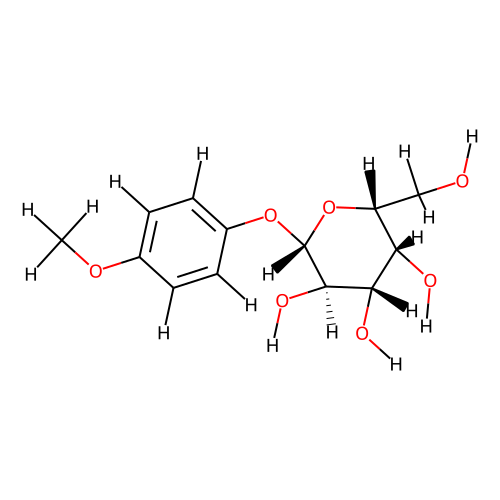

In [10]:
Draw.MolsToGridImage(glyco2['mol'][0:1],molsPerRow=1,subImgSize=(500,500))

Generating molecular descriptors using RDKIT

In [11]:
Desc_list_func = MoleculeDescriptors.MolecularDescriptorCalculator(x[0] for x in Descriptors._descList)

In [12]:
names = Desc_list_func.GetDescriptorNames()

In [13]:
names[20:30]

('BCUT2D_CHGLO',
 'BCUT2D_LOGPHI',
 'BCUT2D_LOGPLOW',
 'BCUT2D_MRHI',
 'BCUT2D_MRLOW',
 'BalabanJ',
 'BertzCT',
 'Chi0',
 'Chi0n',
 'Chi0v')

In [14]:
len(names)

208

In [15]:
Des_func = MoleculeDescriptors.MolecularDescriptorCalculator(['BalabanJ','BertzCT','HallKierAlpha','MolLogP','ExactMolWt','FpDensityMorgan1','MaxPartialCharge','FractionCSP3','NHOHCount','NOCount'])

In [16]:
des = []

for mol in glyco2['mol']:
  des.append(Des_func.CalcDescriptors(mol))


In [17]:
Final_glyco2 = pd.concat([glyco2, pd.DataFrame(des, columns=(['BalabanJ','BertzCT','HallKierAlpha','MolLogP','ExactMolWt','FpDensityMorgan1','MaxPartialCharge','FractionCSP3','NHOHCount','NOCount']))], axis=1)

In [18]:
Final_glyco2.head()

,Name,SMILES,Concentration (mM),Exp. % MGS,mol,BalabanJ,BertzCT,HallKierAlpha,MolLogP,ExactMolWt,FpDensityMorgan1,MaxPartialCharge,FractionCSP3,NHOHCount,NOCount
0,4-methoxyphenyl ß-d-galactopyranoside,COc1ccc(O[C@@H]2O[C@H](CO)[C@H](O)[C@H](O)[C@H...,22,78.3,"<img data-content=""rdkit/molecule"" src=""data:i...",2.919930,1039.054907,-1.38,-1.1261,286.105253,1.100000,0.228721,0.538462,4,7
1,4-methoxyphenyl ß-d-glucopyranoside,COc1ccc(O[C@@H]2O[C@H](CO)[C@@H](O)[C@H](O)[C@...,22,23.3,"<img data-content=""rdkit/molecule"" src=""data:i...",2.919930,1039.054907,-1.38,-1.1261,286.105253,1.100000,0.228721,0.538462,4,7
2,4-methoxyphenyl α-d-galactopyranoside,COc1ccc(O[C@H]2O[C@H](CO)[C@H](O)[C@H](O)[C@H]...,22,76.4,"<img data-content=""rdkit/molecule"" src=""data:i...",2.919930,1039.054907,-1.38,-1.1261,286.105253,1.100000,0.228721,0.538462,4,7
3,4-methoxyphenyl α-d-glucopyranoside,COc1ccc(O[C@H]2O[C@H](CO)[C@@H](O)[C@H](O)[C@H...,22,63.2,"<img data-content=""rdkit/molecule"" src=""data:i...",2.919930,1039.054907,-1.38,-1.1261,286.105253,1.100000,0.228721,0.538462,4,7
4,4-bromophenyl ß-d-glucopyranoside,OC[C@H]1O[C@@H](Oc2ccc(Br)cc2)[C@H](O)[C@@H](O...,22,10.0,"<img data-content=""rdkit/molecule"" src=""data:i...",2.952166,939.292433,-0.70,-0.3722,334.005200,1.210526,0.228721,0.500000,4,6


In [19]:
## HETEROATOMS ##
des = []

for mol in glyco2['mol']:
    temp = []
    temp.append(rdMolDescriptors.CalcNumHeteroatoms(mol))
    temp.append(rdMolDescriptors.CalcNumHeterocycles(mol))
    temp.append(rdMolDescriptors.CalcNumLipinskiHBA(mol))
    temp.append(rdMolDescriptors.CalcNumLipinskiHBD(mol))
    temp.append(rdMolDescriptors.CalcNumRings(mol))
    temp.append(rdMolDescriptors.CalcNumRotatableBonds(mol))
    temp.append(rdMolDescriptors.CalcNumSaturatedCarbocycles(mol))
    temp.append(rdMolDescriptors.CalcNumSaturatedHeterocycles(mol))
    temp.append(rdMolDescriptors.CalcNumSaturatedRings(mol))
    temp.append(rdMolDescriptors.CalcTPSA(mol))
    des.append(temp)

des
    

Final_glyco2 = pd.concat([Final_glyco2, pd.DataFrame(des, columns=(['Heteroatoms','Heterocycles','LipinskiHBA','LipinskiHBD','Rings','Rotable bonds','Saturated carbocyles','Saturated Heterocycles','Saturated Rings','TPSA']))], axis=1)

In [20]:
Final_glyco2 = pd.read_csv('std_glyco2.csv')

In [21]:
Final_glyco2.shape

(223, 46)

In [22]:
glyco2.iloc[:,3]
glyco2.rename(columns = {'Exp. % MGS':'EXP_MGS'}, inplace = True)
glyco2.head()

    

,Name,SMILES,Concentration (mM),EXP_MGS,mol
0,4-methoxyphenyl ß-d-galactopyranoside,COc1ccc(O[C@@H]2O[C@H](CO)[C@H](O)[C@H](O)[C@H...,22,78.3,"<img data-content=""rdkit/molecule"" src=""data:i..."
1,4-methoxyphenyl ß-d-glucopyranoside,COc1ccc(O[C@@H]2O[C@H](CO)[C@@H](O)[C@H](O)[C@...,22,23.3,"<img data-content=""rdkit/molecule"" src=""data:i..."
2,4-methoxyphenyl α-d-galactopyranoside,COc1ccc(O[C@H]2O[C@H](CO)[C@H](O)[C@H](O)[C@H]...,22,76.4,"<img data-content=""rdkit/molecule"" src=""data:i..."
3,4-methoxyphenyl α-d-glucopyranoside,COc1ccc(O[C@H]2O[C@H](CO)[C@@H](O)[C@H](O)[C@H...,22,63.2,"<img data-content=""rdkit/molecule"" src=""data:i..."
4,4-bromophenyl ß-d-glucopyranoside,OC[C@H]1O[C@@H](Oc2ccc(Br)cc2)[C@H](O)[C@@H](O...,22,10.0,"<img data-content=""rdkit/molecule"" src=""data:i..."


In [23]:
y_output = []

for mgs in glyco2['EXP_MGS']:
    if mgs>30.0:
        y_output.append(0)
    else:
        y_output.append(1)

In [24]:
y_out = np.array(y_output)

In [25]:
uniq, fre = np.unique(y_out, return_counts = True)
print(uniq[0],' = ',fre[0])
print(uniq[1],' = ',fre[1])


0  =  173
1  =  50


In [26]:
glyco2.dtypes

Name                   object
SMILES                 object
Concentration (mM)     object
EXP_MGS               float64
mol                    object
dtype: object

In [27]:
Final_glyco2.dtypes

Name     object
0       float64
1       float64
2       float64
3       float64
4       float64
5       float64
6       float64
7       float64
8         int64
9         int64
10      float64
11      float64
12      float64
13      float64
14      float64
15      float64
16      float64
17      float64
18      float64
19      float64
20      float64
21      float64
22      float64
23        int64
24        int64
25        int64
26        int64
27        int64
28        int64
29        int64
30        int64
31        int64
32        int64
33        int64
34        int64
35        int64
36        int64
37        int64
38        int64
39        int64
40        int64
41      float64
42      float64
43      float64
44      float64
dtype: object

In [29]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import LeaveOneOut
import tensorflow as tf
from sklearn.metrics import accuracy_score, f1_score
from tensorflow.keras import layers
from tensorflow.keras import models
from imblearn.over_sampling import SMOTE
import shap
import matplotlib.pyplot as plt

In [32]:
Final_glyco2[:1]

,Name,0,1,2,3,4,5,6,7,8,...,35,36,37,38,39,40,41,42,43,44
0,4-methoxyphenyl ß-d-galactopyranoside,2.91993,1039.05491,-1.38,-1.1261,286.10525,1.3,0.22872,0.53846,4,...,4,2,9,0,1,1,0.83637,701.41218,0.20035,108.61


In [33]:
Final_glyco2.iloc[3,1]

2.91993

In [34]:
## Droppinf the column not generated for mof data
##Final_glyco2.drop(['10','14','15','16','17','21','22','41','42','43'],axis = 1,inplace=True)
Final_glyco2.shape

(223, 46)

In [35]:
data_temp  = Final_glyco2.to_numpy() #converting the data to numpy

In [38]:
col = data_temp[:,1:46]
col.shape          ## Extracting the columns from 0 - 44 for min max scaling

(223, 45)

In [39]:
scaler = MinMaxScaler()
re_col = scaler.fit_transform(col);


In [40]:
re_col.shape

(223, 45)

## OVERSAMPLING(SMOTE) ##

In [41]:
sm = SMOTE(random_state= 42)
X_res, Y_res = sm.fit_resample(re_col,y_out) 


In [42]:
uniq, fre = np.unique(Y_res, return_counts = True)
print(uniq[0],' = ',fre[0])
print(uniq[1],' = ',fre[1])

0  =  173
1  =  173


In [43]:
X_res[:,1].size

346

## MODEL BUILDING ##

In [44]:
# Set random seed
tf.random.set_seed(42)

# Model building
model = models.Sequential()
model.add(layers.Dense(45, input_dim = len(X_res[0,:]), activation = 'relu'))
model.add(layers.Dense(45, activation  = 'relu'))
model.add(layers.Dense(20, activation  = 'relu'))
model.add(layers.Dense(10, activation  = 'relu'))
model.add(layers.Dense(1, activation  = 'sigmoid'))

model.compile(optimizer='adagrad', loss='binary_crossentropy', metrics=['accuracy'])


In [45]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 45)                2070      
                                                                 
 dense_1 (Dense)             (None, 45)                2070      
                                                                 
 dense_2 (Dense)             (None, 20)                920       
                                                                 
 dense_3 (Dense)             (None, 10)                210       
                                                                 
 dense_4 (Dense)             (None, 1)                 11        
                                                                 
Total params: 5,281
Trainable params: 5,281
Non-trainable params: 0
_________________________________________________________________


In [46]:
## Leave one out ##

shap_values_model_list = []

cv = LeaveOneOut()
y_true, y_pred = list(), list()
epoch = 0;

for train_ix, test_ix in cv.split(X_res):
    X_train, X_test = X_res[train_ix, :], X_res[test_ix, :]
    y_train, y_test = Y_res[train_ix], Y_res[test_ix]
    model.fit(X_train,y_train)
    

    
    y_hat = model.predict(X_test) ## Evaluate model
    y_true.append(y_test[0])
    y_pred.append(y_hat[0])
    epoch = epoch + 1
    if epoch>300:
        break
    

#acc = f1_score(y_true, y_pred)
#acc 

1/1 [==============================] - 0s 29ms/step


In [47]:
y_pred

[array([0.47709122], dtype=float32),
 array([0.47851664], dtype=float32),
 array([0.47837135], dtype=float32),
 array([0.48067406], dtype=float32),
 array([0.47575194], dtype=float32),
 array([0.48129395], dtype=float32),
 array([0.4830915], dtype=float32),
 array([0.48747876], dtype=float32),
 array([0.48039076], dtype=float32),
 array([0.4888543], dtype=float32),
 array([0.4816014], dtype=float32),
 array([0.48261175], dtype=float32),
 array([0.48279878], dtype=float32),
 array([0.48086074], dtype=float32),
 array([0.48379135], dtype=float32),
 array([0.48281607], dtype=float32),
 array([0.48850328], dtype=float32),
 array([0.48677838], dtype=float32),
 array([0.4888992], dtype=float32),
 array([0.48263675], dtype=float32),
 array([0.48276013], dtype=float32),
 array([0.4846057], dtype=float32),
 array([0.4824163], dtype=float32),
 array([0.491864], dtype=float32),
 array([0.4872821], dtype=float32),
 array([0.48174757], dtype=float32),
 array([0.48473978], dtype=float32),
 array([0.

In [48]:
type(X_test)

numpy.ndarray

In [49]:
mof_df = pd.read_csv('mof_std.csv')

In [50]:
mof_df_numpy = mof_df.to_numpy()
mof_df_numpy.shape

(6, 46)

In [59]:
mof_df_numpy_re = mof_df_numpy[:,1:46]
print(mof_df_numpy_re.shape)
mof_df_numpy_re = mof_df_numpy_re.astype(np.float32)
scaler_mof = MinMaxScaler()
re_mof = scaler_mof.fit_transform(mof_df_numpy_re)
model.predict(re_mof)

(6, 45)
1/1 [==============================] - 0s 25ms/step


array([[0.3375711 ],
       [0.4799886 ],
       [0.40556997],
       [0.7275239 ],
       [0.79117835],
       [0.743004  ]], dtype=float32)

In [60]:
explainer_model = shap.Explainer(model,re_mof)
shap_values_model = explainer_model(re_mof)


In [61]:
shap_values_model[0]

.values =
array([ 0.00074808, -0.00978739, -0.00609767, -0.00068717,  0.00621794,
        0.0010161 ,  0.01322775,  0.        , -0.02543598, -0.0156556 ,
        0.00904533, -0.02297474, -0.00658075, -0.00875773, -0.01674388,
        0.        , -0.01067337, -0.00886235, -0.05714818, -0.02317047,
       -0.02134403, -0.0159058 , -0.0069197 ,  0.        ,  0.        ,
        0.        ,  0.        , -0.00758156,  0.        , -0.0046774 ,
       -0.01208902, -0.01582422, -0.00141076,  0.        , -0.01631267,
        0.01337708,  0.00664194, -0.01273123,  0.        ,  0.        ,
        0.        , -0.01119175, -0.01349003,  0.04091459,  0.01762977])

.base_values =
array([0.580806])

.data =
array([7.5355029e-01, 0.0000000e+00, 1.0000000e+00, 2.0040289e-01,
       0.0000000e+00, 5.4621840e-01, 1.5258789e-05, 0.0000000e+00,
       0.0000000e+00, 0.0000000e+00, 7.1407646e-01, 0.0000000e+00,
       0.0000000e+00, 0.0000000e+00, 9.4456387e-01, 0.0000000e+00,
       1.0000000e+00, 9.999999

(45,)


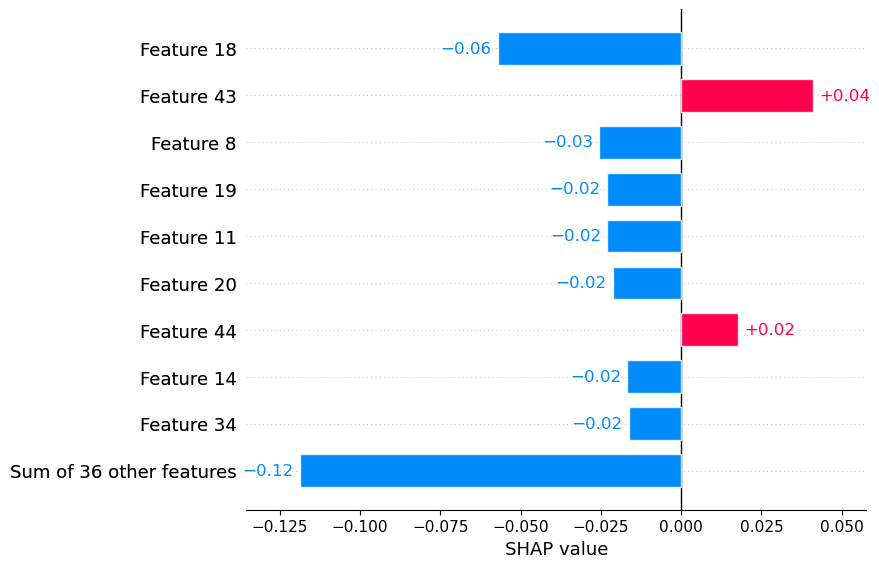

In [63]:
print(shap_values_model[0].shape)
shap.plots.bar(shap_values_model[0])
##model.predict(re_col)[100]

In [64]:
y_t = np.array(y_true)
y_p = np.array(y_pred).round()
acc = f1_score(y_t, y_p)
print(acc)
y_t

0.7101449275362318


array([0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1,
       1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0,
       0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0,
       0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0,
       0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]

## MODEL FOR THE GLYCO2 DATASET USING MOLECULAR CLIQUES ##

In [580]:
mol_clq = pd.read_csv('clq_glyco2.csv')

In [581]:
mol_clq.head()

,NAME,CO,C1CCOCC1,C1=CC=NC=C1,CS,C1CCOC1,C[NH3+],C,C1CC1,C#C,...,C=C,[NH2+]=O,CBr,C=O,C1=CC=CC=C1,N,NN,[NH3+][O-],CN,CCl
0,4-Methoxyphenyl ß-D-galactopyranoside,8,1,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
1,4-Methoxyphenyl ß-D-glucopyranoside,8,1,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
2,4-Methoxyphenyl α-D-galactopyranoside,8,1,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
3,4-Methoxyphenyl α-D-glucopyranoside,8,1,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
4,4-Bromophenyl ß-D-glucopyranoside,6,1,0,0,0,0,0,0,0,...,0,0,1,0,1,0,0,0,0,0


In [582]:
mol_clq.shape

(225, 25)

In [583]:
## NORMALIZING THE VALUES

temp_d  = mol_clq.to_numpy() #converting the data to numpy
x_clq = temp_d[:,1:25]
print(x_clq.shape)  
scaler2 = MinMaxScaler()
x_clq_res = scaler2.fit_transform(x_clq);
print(x_clq_res[227:230,:])

(225, 24)
[]


In [584]:
i = 0


mol_clq = mol_clq.dropna(subset=['NAME'])

print(mol_clq.shape)

Final_glyco2['Name'] = Final_glyco2['Name'].astype(str)

fre = 0
for name1 in mol_clq['NAME']:   
    i = i+1 
    fre = 0
    for name2 in Final_glyco2['Name']:
        if name1.lower() == name2.lower():
           fre = fre + 1
           print(i)
           
    
        ##mol_clq = mol_clq.drop([name1])
        


(224, 25)
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
224


## MODEL FOR DIFFERENT DESCRIPTORS ##

In [585]:
mol_clq = pd.read_csv('clq_glyco2_final.csv')

In [586]:
mol_clq.head()

,Name,CO,C1CCOCC1,C1=CC=NC=C1,CS,C1CCOC1,C[NH3+],C,C1CC1,C#C,...,[NH2+]=O,CBr,C=O,C1=CC=CC=C1,N,NN,[NH3+][O-],CN,CCl,ExpperMGS
0,4-Methoxyphenyl ß-D-galactopyranoside,8,1,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,78.3
1,4-Methoxyphenyl ß-D-glucopyranoside,8,1,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,23.3
2,4-Methoxyphenyl α-D-galactopyranoside,8,1,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,76.4
3,4-Methoxyphenyl α-D-glucopyranoside,8,1,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,63.2
4,4-Bromophenyl ß-D-glucopyranoside,6,1,0,0,0,0,0,0,0,...,0,1,0,1,0,0,0,0,0,10.0


In [587]:
y_clq = []

for mgs in mol_clq['ExpperMGS']:
    if mgs>30.0:
        y_clq.append(0)
    else:
        y_clq.append(1)

y_clq = np.array(y_clq)
type(y_clq)

numpy.ndarray

In [588]:
y_clq[:10]

array([0, 1, 0, 0, 1, 1, 1, 0, 0, 0])

In [589]:
x_clq = mol_clq.iloc[:,1:25]

In [590]:
x_clq_arr = x_clq.to_numpy()

In [591]:
x_clq_arr[:5]

array([[8, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
        0, 0],
       [8, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
        0, 0],
       [8, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
        0, 0],
       [8, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
        0, 0],
       [6, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0,
        0, 0]], dtype=int64)

In [592]:
scaler2 = MinMaxScaler()
x_clq_res = scaler2.fit_transform(x_clq_arr)

In [593]:
x_clq_res[:2]

array([[0.44444444, 0.33333333, 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.03703704,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.5       , 0.        ,
        0.        , 0.        , 0.        , 0.        ],
       [0.44444444, 0.33333333, 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.03703704,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.5       , 0.        ,
        0.        , 0.        , 0.        , 0.        ]])

In [594]:
print(x_clq_res.shape)
print(y_clq.shape)

(219, 24)
(219,)


In [595]:
uniq, fre = np.unique(y_clq, return_counts = True)
print(uniq[0],' = ',fre[0])
print(uniq[1],' = ',fre[1])


0  =  171
1  =  48


In [596]:
##OVERSAMPLING

sm2 = SMOTE(random_state= 42)
X_cres, Y_cres = sm2.fit_resample(x_clq_res,y_clq) 

In [597]:
uniq, fre = np.unique(Y_cres, return_counts = True)
print(uniq[0],' = ',fre[0])
print(uniq[1],' = ',fre[1])

0  =  171
1  =  171


In [598]:
X_cres.shape

(342, 24)

In [599]:
## MODEL BUILDING ##

# Set random seed
tf.random.set_seed(42)

# Model building
model2 = models.Sequential()
model2.add(layers.Dense(24, input_dim = len(X_cres[0,:]), activation = 'relu'))
model2.add(layers.Dense(40, activation  = 'relu'))
model2.add(layers.Dense(20, activation  = 'relu'))
model2.add(layers.Dense(10, activation  = 'relu'))
model2.add(layers.Dense(1, activation  = 'sigmoid'))

model2.compile(optimizer='adagrad', loss='mse', metrics=['accuracy'])



In [600]:
model2.summary()

Model: "sequential_18"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_81 (Dense)            (None, 24)                600       
                                                                 
 dense_82 (Dense)            (None, 40)                1000      
                                                                 
 dense_83 (Dense)            (None, 20)                820       
                                                                 
 dense_84 (Dense)            (None, 10)                210       
                                                                 
 dense_85 (Dense)            (None, 1)                 11        
                                                                 
Total params: 2,641
Trainable params: 2,641
Non-trainable params: 0
_________________________________________________________________


In [601]:
## Leave one out ##

cv = LeaveOneOut()
y_true, y_pred = list(), list()
epoch = 0;

for train_ix, test_ix in cv.split(X_cres):
    X_train, X_test = X_cres[train_ix, :], X_cres[test_ix, :]
    y_train, y_test = Y_cres[train_ix], Y_cres[test_ix]
    model2.fit(X_train,y_train)
    
    y_hat = model2.predict(X_test) ## Evaluate model
    y_true.append(y_test[0])
    y_pred.append(y_hat[0])
    epoch = epoch + 1
    if epoch>300:
        break

1/1 [==============================] - 0s 27ms/step


In [602]:
y_clq_pred = np.array(y_pred).round()
y_clq_true = np.array(y_true)

acc2 = f1_score(y_clq_true, y_clq_pred)
print(acc2)

0.6089108910891089


In [603]:
explainer_model = shap.Explainer(model2,X_train)
shap_values_model = explainer_model(X_train)

Permutation explainer: 342it [00:26,  8.44it/s]                         


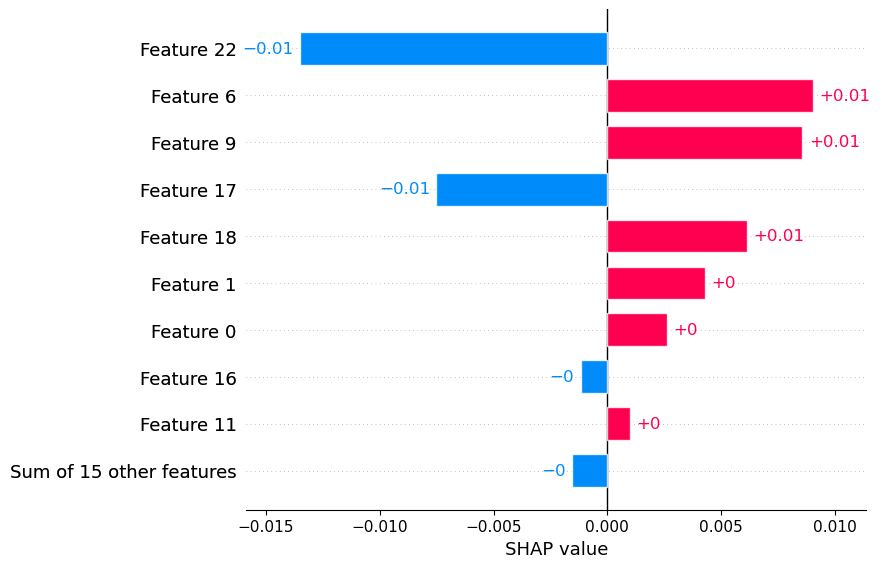

In [604]:
##print(shap_values_model[0].shape)
shap.plots.bar(shap_values_model[100])
##model.predict(re_col)[100]

In [605]:
## SOAP DESCRIPTOR ##
##

In [606]:
soap_glyco2 = pd.read_csv('soaps_glyco2_final.csv')

In [607]:
soap_glyco2.head()

,Name,0,1,2,3,4,5,6,7,8,...,2071,2072,2073,2074,2075,2076,2077,2078,2079,ExpperMGS
0,4-Methoxyphenyl ß-D-galactopyranoside,0.246619,2.860000e-06,0.000006,1.600000e-06,0.000007,3.550000e-07,3.100000e-07,6.180000e-08,1.240000e-07,...,2.020000e-10,3.170000e-10,1.440000e-10,3.120000e-10,7.000000e-11,1.460000e-10,5.810000e-11,9.510000e-11,0,78.3
1,4-Methoxyphenyl ß-D-glucopyranoside,0.242988,4.790000e-06,0.000009,1.750000e-06,0.000004,1.310000e-07,5.150000e-07,3.590000e-08,2.260000e-07,...,3.630000e-10,4.550000e-10,1.750000e-10,3.270000e-10,1.720000e-10,1.520000e-10,1.480000e-10,1.040000e-10,0,23.3
2,4-Methoxyphenyl α-D-galactopyranoside,0.245352,3.860000e-06,0.000004,3.290000e-06,0.000005,2.240000e-07,4.550000e-07,8.320000e-08,1.600000e-07,...,3.080000e-10,4.030000e-10,2.210000e-10,4.130000e-10,1.240000e-10,2.090000e-10,7.540000e-11,1.310000e-10,0,76.4
3,4-Methoxyphenyl α-D-glucopyranoside,0.243601,2.650000e-07,0.000009,1.170000e-06,0.000006,1.090000e-07,4.060000e-07,2.790000e-08,1.560000e-07,...,4.610000e-10,5.600000e-10,2.940000e-10,4.160000e-10,8.070000e-11,1.550000e-10,3.560000e-11,1.000000e-10,0,63.2
4,4-Bromophenyl ß-D-glucopyranoside,0.218458,9.600000e-07,0.000006,6.350000e-07,0.000006,1.870000e-07,2.470000e-07,5.070000e-08,6.850000e-08,...,1.690000e-10,9.600000e-11,5.440000e-11,7.360000e-11,1.020000e-11,7.680000e-11,5.240000e-11,6.780000e-11,0,10.0


In [608]:
soap_glyco2.shape

(215, 2082)

In [609]:
y_soap = []

for mgs in soap_glyco2['ExpperMGS']:
    if mgs>30.0:
        y_soap.append(0)
    else:
        y_soap.append(1)

y_soap = np.array(y_soap)
type(y_soap)

numpy.ndarray

In [610]:
y_soap[:5]

array([0, 1, 0, 0, 1])

In [611]:
x_soap = soap_glyco2.iloc[:,1:2081]
x_soap_arr = x_soap.to_numpy()
x_soap.head()

,0,1,2,3,4,5,6,7,8,9,...,2070,2071,2072,2073,2074,2075,2076,2077,2078,2079
0,0.246619,2.860000e-06,0.000006,1.600000e-06,0.000007,3.550000e-07,3.100000e-07,6.180000e-08,1.240000e-07,0.139213,...,3.960000e-10,2.020000e-10,3.170000e-10,1.440000e-10,3.120000e-10,7.000000e-11,1.460000e-10,5.810000e-11,9.510000e-11,0
1,0.242988,4.790000e-06,0.000009,1.750000e-06,0.000004,1.310000e-07,5.150000e-07,3.590000e-08,2.260000e-07,0.136836,...,7.290000e-10,3.630000e-10,4.550000e-10,1.750000e-10,3.270000e-10,1.720000e-10,1.520000e-10,1.480000e-10,1.040000e-10,0
2,0.245352,3.860000e-06,0.000004,3.290000e-06,0.000005,2.240000e-07,4.550000e-07,8.320000e-08,1.600000e-07,0.137940,...,4.990000e-10,3.080000e-10,4.030000e-10,2.210000e-10,4.130000e-10,1.240000e-10,2.090000e-10,7.540000e-11,1.310000e-10,0
3,0.243601,2.650000e-07,0.000009,1.170000e-06,0.000006,1.090000e-07,4.060000e-07,2.790000e-08,1.560000e-07,0.136687,...,6.890000e-10,4.610000e-10,5.600000e-10,2.940000e-10,4.160000e-10,8.070000e-11,1.550000e-10,3.560000e-11,1.000000e-10,0
4,0.218458,9.600000e-07,0.000006,6.350000e-07,0.000006,1.870000e-07,2.470000e-07,5.070000e-08,6.850000e-08,0.112243,...,2.160000e-10,1.690000e-10,9.600000e-11,5.440000e-11,7.360000e-11,1.020000e-11,7.680000e-11,5.240000e-11,6.780000e-11,0


In [612]:
scaler3 = MinMaxScaler()
x_soap_res = scaler3.fit_transform(x_soap_arr)
x_soap_res[:2]

array([[0.32863622, 0.29890235, 0.07410772, ..., 0.34947528, 0.29582589,
        0.        ],
       [0.31019349, 0.50299262, 0.11343284, ..., 0.91781515, 0.32526295,
        0.        ]])

In [613]:
uniq, fre = np.unique(y_soap, return_counts = True)
print(uniq[0],' = ',fre[0])
print(uniq[1],' = ',fre[1])

0  =  165
1  =  50


In [614]:
##OVERSAMPLING

sm3 = SMOTE(random_state= 42)
X_sres, Y_sres = sm3.fit_resample(x_soap_res,y_soap) 

In [615]:
uniq, fre = np.unique(Y_sres, return_counts = True)
print(uniq[0],' = ',fre[0])
print(uniq[1],' = ',fre[1])
print(X_sres.shape)

0  =  165
1  =  165
(330, 2080)


In [616]:
## MODEL BUILDING ##

# Set random seed
tf.random.set_seed(42)

# Model building
model3 = models.Sequential()
model3.add(layers.Dense(2080, input_dim = len(X_sres[0,:]), activation = 'relu'))
model3.add(layers.Dense(100, activation  = 'relu'))
model3.add(layers.Dense(50, activation  = 'relu'))
model3.add(layers.Dense(1, activation  = 'sigmoid'))

model3.compile(optimizer='adagrad', loss='binary_crossentropy', metrics=['accuracy'])


In [617]:
model3.summary()

Model: "sequential_19"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_86 (Dense)            (None, 2080)              4328480   
                                                                 
 dense_87 (Dense)            (None, 100)               208100    
                                                                 
 dense_88 (Dense)            (None, 50)                5050      
                                                                 
 dense_89 (Dense)            (None, 1)                 51        
                                                                 
Total params: 4,541,681
Trainable params: 4,541,681
Non-trainable params: 0
_________________________________________________________________


In [618]:
## Leave one out ##

cv = LeaveOneOut()
y_true, y_pred = list(), list()
epoch = 0;

for train_ix, test_ix in cv.split(X_sres):
    X_train, X_test = X_sres[train_ix, :], X_sres[test_ix, :]
    y_train, y_test = Y_sres[train_ix], Y_sres[test_ix]
    model3.fit(X_train,y_train)
    
    y_hat = model3.predict(X_test) ## Evaluate model
    y_true.append(y_test[0])
    y_pred.append(y_hat[0])
    epoch = epoch + 1
    if epoch>300:
        break

1/1 [==============================] - 0s 26ms/step


In [619]:
y_pred = model3.predict(x_soap_res)
y_soap_pred = np.array(y_pred).round()
y_soap_true = np.array(y_soap)

acc3 = f1_score(y_soap_true, y_soap_pred)
print(acc3)

7/7 [==============================] - 0s 12ms/step
0.9696969696969697


In [620]:
print(y_soap_pred.shape)
print(y_soap_true.shape)

(215, 1)
(215,)


In [621]:
explainer_model = shap.Explainer(model3,X_train)
print(X_train.shape)
##shap_values_model = explainer_model(X_train)

(329, 2080)


In [622]:
## HYDRATION HISTROGRAM DESCRIPTOR ##

hydhist_glyco2 = pd.read_csv('hydhist_glyco2_final.csv')

In [623]:
hydhist_glyco2.head()

,Name,0.0025,0.0075,0.0125,0.0175,0.0225,0.0275,0.0325,0.0375,0.0425,...,0.4575,0.4625,0.4675,0.4725,0.4775,0.4825,0.4875,0.4925,0.4975,ExpperMGS
0,4-Methoxyphenyl ß-D-galactopyranoside,0,0,0,0,0,0,0,0,0,...,3.0749,3.1807,3.1436,3.1015,3.2170,3.2121,3.3963,3.4395,3.5538,78.3
1,4-Methoxyphenyl ß-D-glucopyranoside,0,0,0,0,0,0,0,0,0,...,3.0639,3.0443,3.1250,3.1499,3.2144,3.3005,3.4534,3.4338,3.5518,23.3
2,4-Methoxyphenyl α-D-galactopyranoside,0,0,0,0,0,0,0,0,0,...,3.1119,3.1113,3.1322,3.1470,3.3116,3.3880,3.3844,3.3508,3.4903,76.4
3,4-Methoxyphenyl α-D-glucopyranoside,0,0,0,0,0,0,0,0,0,...,3.0621,3.0297,3.1793,3.2043,3.2566,3.3093,3.3246,3.4098,3.5781,63.2
4,4-Bromophenyl ß-D-glucopyranoside,0,0,0,0,0,0,0,0,0,...,3.1066,3.1121,3.1916,3.2789,3.3443,3.5291,3.5109,3.6392,3.8071,10.0


In [624]:
hydhist_glyco2.shape

(203, 102)

In [625]:
y_hydhist = []

for mgs in hydhist_glyco2['ExpperMGS']:
    if mgs>30.0:
        y_hydhist.append(0)
    else:
        y_hydhist.append(1)

y_hydhist = np.array(y_hydhist)
type(y_hydhist)

numpy.ndarray

In [626]:
uniq, fre = np.unique(y_hydhist, return_counts = True)
print(uniq[0],' = ',fre[0])
print(uniq[1],' = ',fre[1])


0  =  160
1  =  43


In [627]:
y_hydhist[:10]

array([0, 1, 0, 0, 1, 1, 1, 0, 0, 0])

In [628]:
x_hydhist = hydhist_glyco2.iloc[:,1:101]
x_hydhist_arr = x_hydhist.to_numpy()
x_hydhist.head()

,0.0025,0.0075,0.0125,0.0175,0.0225,0.0275,0.0325,0.0375,0.0425,0.0475,...,0.4525,0.4575,0.4625,0.4675,0.4725,0.4775,0.4825,0.4875,0.4925,0.4975
0,0,0,0,0,0,0,0,0,0,0,...,3.0431,3.0749,3.1807,3.1436,3.1015,3.2170,3.2121,3.3963,3.4395,3.5538
1,0,0,0,0,0,0,0,0,0,0,...,3.0593,3.0639,3.0443,3.1250,3.1499,3.2144,3.3005,3.4534,3.4338,3.5518
2,0,0,0,0,0,0,0,0,0,0,...,3.1195,3.1119,3.1113,3.1322,3.1470,3.3116,3.3880,3.3844,3.3508,3.4903
3,0,0,0,0,0,0,0,0,0,0,...,3.0884,3.0621,3.0297,3.1793,3.2043,3.2566,3.3093,3.3246,3.4098,3.5781
4,0,0,0,0,0,0,0,0,0,0,...,3.1750,3.1066,3.1121,3.1916,3.2789,3.3443,3.5291,3.5109,3.6392,3.8071


In [629]:
scaler4 = MinMaxScaler()
x_hydhist_res = scaler4.fit_transform(x_hydhist_arr)
x_hydhist_res[:1]

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.04107293, 0.07977208, 0.14256014,
        0.28098456, 0.32802678, 0.32451349, 0.34360694, 0.36024265,
        0.36054839, 0.33390565, 0.31851714, 0.27002743, 0.24864984,
        0.23947105, 0.24858896, 0.22171254, 0.3228793 , 0.49081906,
        0.48490763, 0.52635728, 0.48900458, 0.52789793, 0.6104034 ,
        0.62135896, 0.64220594, 0.6454057 , 0.49919283, 0.37017567,
        0.35877957, 0.31911378, 0.27658195, 0.36239706, 0.47990711,
        0.52375282, 0.48873826, 0.51068543, 0.65024631, 0.6697963 ,
        0.74012739, 0.79190956, 0.72497661, 0.83

In [630]:
##OVERSAMPLING

sm4 = SMOTE(random_state= 42)
X_hhres, Y_hhres = sm4.fit_resample(x_hydhist_res,y_hydhist) 

In [631]:
uniq, fre = np.unique(Y_hhres, return_counts = True)
print(uniq[0],' = ',fre[0])
print(uniq[1],' = ',fre[1])
print(X_hhres.shape)

0  =  160
1  =  160
(320, 100)


In [632]:
## MODEL BUILDING ##

# Set random seed
tf.random.set_seed(42)

# Model building
model4 = models.Sequential()
model4.add(layers.Dense(100, input_dim = len(X_hhres[0,:]), activation = 'relu'))
model4.add(layers.Dense(50, activation  = 'relu'))
model4.add(layers.Dense(25, activation  = 'relu'))
model4.add(layers.Dense(15, activation  = 'relu'))
model4.add(layers.Dense(1, activation  = 'sigmoid'))

model4.compile(optimizer='adagrad', loss='binary_crossentropy', metrics=['accuracy'])

In [633]:
model4.summary()

Model: "sequential_20"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_90 (Dense)            (None, 100)               10100     
                                                                 
 dense_91 (Dense)            (None, 50)                5050      
                                                                 
 dense_92 (Dense)            (None, 25)                1275      
                                                                 
 dense_93 (Dense)            (None, 15)                390       
                                                                 
 dense_94 (Dense)            (None, 1)                 16        
                                                                 
Total params: 16,831
Trainable params: 16,831
Non-trainable params: 0
_________________________________________________________________


In [634]:
## Leave one out ##

cv = LeaveOneOut()
y_true, y_pred = list(), list()
epoch = 0;

for train_ix, test_ix in cv.split(X_hhres):
    X_train, X_test = X_hhres[train_ix, :], X_hhres[test_ix, :]
    y_train, y_test = Y_hhres[train_ix], Y_hhres[test_ix]
    model4.fit(X_train,y_train)
    
    y_hat = model4.predict(X_test) ## Evaluate model
    y_true.append(y_test[0])
    y_pred.append(y_hat[0])
    epoch = epoch + 1
    if epoch>300:
        break

1/1 [==============================] - 0s 28ms/step


In [635]:
y_hydhist_pred = np.array(y_pred).round()
y_hydhist_true = np.array(y_true)

acc4 = f1_score(y_hydhist_true, y_hydhist_pred)
print(acc4)

0.7125748502994012


In [643]:
explainer_model = shap.KernelExplainer(model4,X_train)
print(X_train.shape)
shap_values_model = explainer_model(X_train[:100])

Using 319 background data samples could cause slower run times. Consider using shap.sample(data, K) or shap.kmeans(data, K) to summarize the background as K samples.


(319, 100)


100%|██████████| 100/100 [08:38<00:00,  5.19s/it]


In [649]:
shap_values4 = explainer_model.shap_values(X_train[:25])
##shap.initjs()
##shap.force_plot(explainer_model.expected_value,shap_values_model[])

100%|██████████| 25/25 [02:09<00:00,  5.16s/it]


In [652]:
shap_values4 = np.reshape(shap_values4, (25, 100))
np.shape(shap_values4.data)

(25, 100)

In [653]:
shap.initjs()
shap.force_plot(explainer_model.expected_value,shap_values4)

In [655]:
shap.initjs()
shap.force_plot(explainer_model.expected_value,shap_values4[21])

In [656]:
model4.predict(X_train)[21]

10/10 [==============================] - 0s 1ms/step


array([0.47616312], dtype=float32)

In [657]:
shap_df4 = pd.DataFrame(shap_values4)
shap_df4.shape

(25, 100)

In [663]:
mod_sum4=shap_df4.abs().sum()/25
mod_sum4 = pd.DataFrame(mod_sum4, columns=['weight'])
mod_sum4['Property'] = [f'Property {i+1}' for i in range(shap_df4.shape[1])]
mod_sum4 = mod_sum4[['Property', 'weight']]
mod_sum4

,Property,weight
0,Property 1,0.000000
1,Property 2,0.000000
2,Property 3,0.000000
3,Property 4,0.000000
4,Property 5,0.000000
...,...,...
95,Property 96,0.001333
96,Property 97,0.003120
97,Property 98,0.000500
98,Property 99,0.001052


In [714]:
mod_sum4_arr = mod_sum4.to_numpy()
print(mod_sum4_arr[70,1])


0.001065764507054782


<BarContainer object of 100 artists>

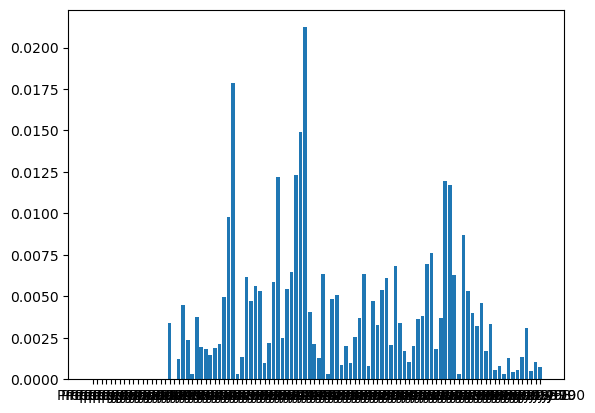

In [664]:
plt.bar(mod_sum4['Property'], mod_sum4['weight'])

In [665]:
type(X_train)

numpy.ndarray

In [668]:
X_train4 = X_train
X_train4_df = pd.DataFrame(X_train4)

In [670]:
X_train4_df.head()

,0,1,2,3,4,5,6,7,8,9,...,90,91,92,93,94,95,96,97,98,99
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.294034,0.276836,0.304060,0.259800,0.203501,0.221378,0.133346,0.219646,0.123746,0.141878
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.304992,0.269774,0.221278,0.248002,0.232317,0.219883,0.188766,0.253252,0.120218,0.140620
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.345712,0.300591,0.261941,0.252569,0.230591,0.275803,0.243621,0.212642,0.068837,0.101943
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.324675,0.268618,0.212417,0.282443,0.264706,0.244161,0.194282,0.177447,0.105361,0.157160
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.383252,0.297188,0.262426,0.290245,0.309121,0.294615,0.332079,0.287093,0.247369,0.301176


In [715]:
X_train4_df_drop = X_train4_df.drop(X_train4_df.columns[[0,1,2,3,4,5,6,7,8,95,94,50,70]], axis  = 1)

X_train4_df_drop

,9,10,11,12,13,14,15,16,17,18,...,88,89,90,91,92,93,96,97,98,99
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,...,0.496888,0.376913,0.294034,0.276836,0.304060,0.259800,0.133346,0.219646,0.123746,0.141878
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,...,0.400714,0.418489,0.304992,0.269774,0.221278,0.248002,0.188766,0.253252,0.120218,0.140620
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,...,0.451344,0.387045,0.345712,0.300591,0.261941,0.252569,0.243621,0.212642,0.068837,0.101943
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,...,0.427129,0.353924,0.324675,0.268618,0.212417,0.282443,0.194282,0.177447,0.105361,0.157160
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.000000,0.0,...,0.462502,0.423940,0.383252,0.297188,0.262426,0.290245,0.332079,0.287093,0.247369,0.301176
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
314,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,...,0.378418,0.263098,0.316185,0.219329,0.186516,0.236857,0.092352,0.194294,0.097696,0.138258
315,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,...,0.382151,0.332347,0.312423,0.247690,0.263679,0.210678,0.176757,0.152489,0.074365,0.130009
316,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,...,0.430588,0.333592,0.267256,0.220361,0.282561,0.197066,0.151683,0.185951,0.144442,0.158110
317,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,...,0.393223,0.311371,0.272473,0.204721,0.278214,0.206033,0.160619,0.183977,0.151441,0.163736


In [716]:
X_train4_df_drop_arr = X_train4_df_drop.to_numpy()
X_hhres = X_train4_df_drop_arr

In [717]:
## MODEL BUILDING ##

# Set random seed
tf.random.set_seed(42)

# Model building
model4 = models.Sequential()
model4.add(layers.Dense(87, input_dim = len(X_hhres[0,:]), activation = 'relu'))
model4.add(layers.Dense(50, activation  = 'relu'))
model4.add(layers.Dense(25, activation  = 'relu'))
model4.add(layers.Dense(15, activation  = 'relu'))
model4.add(layers.Dense(1, activation  = 'sigmoid'))

model4.compile(optimizer='adagrad', loss='binary_crossentropy', metrics=['accuracy'])

In [718]:
## Leave one out ##

cv = LeaveOneOut()
y_true, y_pred = list(), list()
epoch = 0;

for train_ix, test_ix in cv.split(X_hhres):
    X_train, X_test = X_hhres[train_ix, :], X_hhres[test_ix, :]
    y_train, y_test = Y_hhres[train_ix], Y_hhres[test_ix]
    model4.fit(X_train,y_train)
    
    y_hat = model4.predict(X_test) ## Evaluate model
    y_true.append(y_test[0])
    y_pred.append(y_hat[0])
    epoch = epoch + 1
    if epoch>300:
        break

1/1 [==============================] - 0s 19ms/step


In [720]:
y_hydhist_pred = np.array(y_pred).round()
y_hydhist_true = np.array(y_true)

acc4 = f1_score(y_hydhist_true, y_hydhist_pred)
print(acc4)

0.7473309608540925


In [ ]:
## HYDRATION INDEX ##


hydidx_glyco2 = pd.read_csv('hydidx_glyco2 _final.csv')

In [ ]:
hydidx_glyco2.head()

,Name,0.2,0.25,0.3,0.35,0.4,0.45,0.5,MinSolv_1,MinSolv_2,Hbonds,ExpperMGS
0,4-Methoxyphenyl ß-D-galactopyranoside,0.006627,0.017478,0.080798,0.141366,0.190173,0.236450,0.279890,0.012113,0.229863,0.031050,78.3
1,4-Methoxyphenyl ß-D-glucopyranoside,0.005803,0.016938,0.078495,0.137489,0.185899,0.231459,0.277255,0.011884,0.223835,0.030402,23.3
2,4-Methoxyphenyl α-D-galactopyranoside,0.007303,0.017331,0.079159,0.138698,0.187338,0.231358,0.276567,0.012398,0.221135,0.030088,76.4
3,4-Methoxyphenyl α-D-glucopyranoside,0.006243,0.015851,0.079331,0.139852,0.187919,0.232593,0.278291,0.010828,0.222236,0.027193,63.2
4,4-Bromophenyl ß-D-glucopyranoside,0.009845,0.021838,0.074807,0.133234,0.184019,0.227873,0.273782,0.015030,0.216443,0.025608,10.0


In [ ]:
y_hydidx = []

for mgs in hydidx_glyco2['ExpperMGS']:
    if mgs>30.0:
        y_hydidx.append(0)
    else:
        y_hydidx.append(1)

y_hydidx = np.array(y_hydidx)
type(y_hydidx)

numpy.ndarray

In [ ]:
y_hydidx[:10]
print(hydidx_glyco2.shape)

(202, 12)


In [ ]:
x_hydidx = hydidx_glyco2.iloc[:,1:11]
x_hydidx_arr = x_hydidx.to_numpy()
x_hydidx.head()

,0.2,0.25,0.3,0.35,0.4,0.45,0.5,MinSolv_1,MinSolv_2,Hbonds
0,0.006627,0.017478,0.080798,0.141366,0.190173,0.236450,0.279890,0.012113,0.229863,0.031050
1,0.005803,0.016938,0.078495,0.137489,0.185899,0.231459,0.277255,0.011884,0.223835,0.030402
2,0.007303,0.017331,0.079159,0.138698,0.187338,0.231358,0.276567,0.012398,0.221135,0.030088
3,0.006243,0.015851,0.079331,0.139852,0.187919,0.232593,0.278291,0.010828,0.222236,0.027193
4,0.009845,0.021838,0.074807,0.133234,0.184019,0.227873,0.273782,0.015030,0.216443,0.025608


In [ ]:
scaler5 = MinMaxScaler()
x_hydidx_res = scaler5.fit_transform(x_hydidx_arr)
x_hydidx_res[:2]

array([[0.30909302, 0.3276982 , 0.46785537, 0.34729692, 0.42341313,
        0.40335483, 0.32541076, 0.31596194, 0.84004117, 0.47476616],
       [0.25411079, 0.30352979, 0.40400672, 0.29993072, 0.3791924 ,
        0.36474859, 0.31149097, 0.30597058, 0.77773266, 0.45897525]])

In [ ]:
uniq, fre = np.unique(y_hydidx, return_counts = True)
print(uniq[0],' = ',fre[0])
print(uniq[1],' = ',fre[1])


0  =  159
1  =  43


In [ ]:
##OVERSAMPLING

sm5 = SMOTE(random_state= 42)
X_hires, Y_hires = sm5.fit_resample(x_hydidx_res,y_hydidx) 

In [ ]:
uniq, fre = np.unique(Y_hires, return_counts = True)
print(uniq[0],' = ',fre[0])
print(uniq[1],' = ',fre[1])
print(X_hires.shape)

0  =  159
1  =  159
(318, 10)


In [ ]:
## MODEL BUILDING ##

# Set random seed
tf.random.set_seed(42)

# Model building
model5 = models.Sequential()
model5.add(layers.Dense(10, input_dim = len(X_hires[0,:]), activation = 'relu'))
model5.add(layers.Dense(10, activation  = 'relu'))
model5.add(layers.Dense(1, activation  = 'sigmoid'))

model5.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [ ]:
model5.summary()

Model: "sequential_11"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_48 (Dense)            (None, 10)                110       
                                                                 
 dense_49 (Dense)            (None, 10)                110       
                                                                 
 dense_50 (Dense)            (None, 1)                 11        
                                                                 
Total params: 231
Trainable params: 231
Non-trainable params: 0
_________________________________________________________________


In [ ]:
## Leave one out ##

cv = LeaveOneOut()
y_true, y_pred = list(), list()
epoch = 0;

for train_ix, test_ix in cv.split(X_hires):
    X_train, X_test = X_hires[train_ix, :], X_hires[test_ix, :]
    y_train, y_test = Y_hires[train_ix], Y_hires[test_ix]
    model5.fit(X_train,y_train)
    
    y_hat = model5.predict(X_test) ## Evaluate model
    y_true.append(y_test[0])
    y_pred.append(y_hat[0])
    epoch = epoch + 1
    if epoch>300:
        break

1/1 [==============================] - 0s 16ms/step


In [ ]:
y_hydidx_pred = np.array(y_pred).round().flatten()
y_hydidx_true = np.array(y_true)
print(y_hydidx_pred)


acc5 = f1_score(y_hydidx_true, y_hydidx_pred)
print(acc5)

[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 0. 0. 1. 1. 0. 1. 1. 0. 0. 1. 0. 0. 0.
 0. 1. 1. 1. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 1. 1.
 1. 0. 1. 0. 1. 1. 1. 1. 1. 0. 1. 0. 1. 1. 1. 1. 1. 0. 0. 0. 0. 1. 0. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 0. 0. 0. 0. 0. 1. 1. 1. 0. 0. 0. 0. 0.
 0. 0. 0. 1. 1. 1. 0. 1. 0. 1. 1. 1. 1. 1. 0. 1. 1. 1. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 1. 1. 1. 1. 1. 1. 1. 1.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 1. 1. 0. 0. 0. 0. 0. 1. 1. 0. 1. 0.
 0. 0. 0. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 0. 1. 1. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 0. 1. 1. 1. 0. 1. 1. 1. 1. 1. 1. 0. 1. 1. 0. 1. 1. 1. 0. 1. 1.
 1. 0. 1. 1. 1. 1. 0. 1. 1. 1. 1. 1. 1.]
0.761006289308176


In [ ]:
explainer_model = shap.Explainer(model5,X_train)
print(X_train.shape)
shap_values_model = explainer_model(X_train)

(317, 10)


Exact explainer: 318it [00:10,  3.37s/it]                 


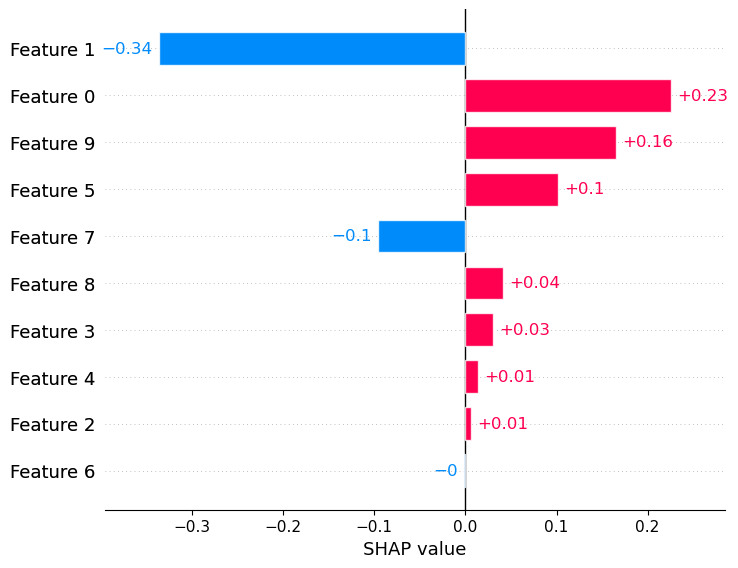

In [ ]:
shap.plots.bar(shap_values_model[200])

In [ ]:
model5.predict(X_train)[0]

10/10 [==============================] - 0s 1ms/step


array([0.19422075], dtype=float32)

In [ ]:
## WASCF DESCRIPTOR ##

wacsf_glyco2 = pd.read_csv('wacsf_glyco2_final.csv')
wacsf_glyco2.head()

,Name,wACSF_Rad0_0,wACSF_Rad0_1,wACSF_Rad0_2,wACSF_Rad0_3,wACSF_Rad0_4,wACSF_Rad0_5,wACSF_Rad0_6,wACSF_Rad0_7,wACSF_Rad0_8,...,wACSF_Ang19_1,wACSF_Ang19_2,wACSF_Ang19_3,wACSF_Ang19_4,wACSF_Ang19_5,wACSF_Ang19_6,wACSF_Ang19_7,wACSF_Ang19_8,wACSF_Ang19_9,ExpperMGS
0,4-Methoxyphenyl ß-D-galactopyranoside,0,9,16,12,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,78.3
1,4-Methoxyphenyl ß-D-glucopyranoside,0,12,14,11,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,23.3
2,4-Methoxyphenyl α-D-galactopyranoside,0,10,15,10,3,0,0,0,0,...,0,0,0,0,0,0,0,0,0,76.4
3,4-Methoxyphenyl α-D-glucopyranoside,0,13,15,10,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,63.2
4,4-Bromophenyl ß-D-glucopyranoside,1,4,16,11,2,0,0,0,0,...,0,0,0,0,0,0,0,0,0,10.0


In [ ]:
wacsf_glyco2.shape

(200, 282)

In [ ]:
y_wacsf = []

for mgs in wacsf_glyco2['ExpperMGS']:
    if mgs>30.0:
        y_wacsf.append(0)
    else:
        y_wacsf.append(1)

y_wacsf = np.array(y_wacsf)
type(y_wacsf)

numpy.ndarray

In [ ]:
y_wacsf[:10]

array([0, 1, 0, 0, 1, 1, 1, 0, 0, 0])

In [ ]:
x_wacsf = wacsf_glyco2.iloc[:,1:281]
x_wacsf_arr = x_wacsf.to_numpy()
x_wacsf.head()

,wACSF_Rad0_0,wACSF_Rad0_1,wACSF_Rad0_2,wACSF_Rad0_3,wACSF_Rad0_4,wACSF_Rad0_5,wACSF_Rad0_6,wACSF_Rad0_7,wACSF_Rad0_8,wACSF_Rad0_9,...,wACSF_Ang19_0,wACSF_Ang19_1,wACSF_Ang19_2,wACSF_Ang19_3,wACSF_Ang19_4,wACSF_Ang19_5,wACSF_Ang19_6,wACSF_Ang19_7,wACSF_Ang19_8,wACSF_Ang19_9
0,0,9,16,12,1,0,0,0,0,0,...,38,0,0,0,0,0,0,0,0,0
1,0,12,14,11,1,0,0,0,0,0,...,38,0,0,0,0,0,0,0,0,0
2,0,10,15,10,3,0,0,0,0,0,...,38,0,0,0,0,0,0,0,0,0
3,0,13,15,10,0,0,0,0,0,0,...,38,0,0,0,0,0,0,0,0,0
4,1,4,16,11,2,0,0,0,0,0,...,34,0,0,0,0,0,0,0,0,0


In [ ]:
scaler6 = MinMaxScaler()
x_wacsf_res = scaler6.fit_transform(x_wacsf_arr)

In [ ]:
uniq, fre = np.unique(y_wacsf, return_counts = True)
print(uniq[0],' = ',fre[0])
print(uniq[1],' = ',fre[1])

0  =  157
1  =  43


In [ ]:
## OVERSAMPLING ##

sm6 = SMOTE(random_state= 42)
X_wres, Y_wres = sm6.fit_resample(x_wacsf_res,y_wacsf) 


uniq, fre = np.unique(Y_wres, return_counts = True)
print(uniq[0],' = ',fre[0])
print(uniq[1],' = ',fre[1])
print(X_hires.shape)



0  =  157
1  =  157
(318, 10)


In [ ]:
## MODEL BUILDING ##

# Set random seed
tf.random.set_seed(42)

# Model building
model6 = models.Sequential()
model6.add(layers.Dense(280, input_dim = len(X_wres[0,:]), activation = 'relu'))
model6.add(layers.Dense(200, activation  = 'relu'))
model6.add(layers.Dense(100, activation  = 'relu'))
model6.add(layers.Dense(50, activation  = 'relu'))
model6.add(layers.Dense(1, activation  = 'sigmoid'))

model6.compile(optimizer='adagrad', loss='binary_crossentropy', metrics=['accuracy'])


model6.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_30 (Dense)            (None, 280)               78680     
                                                                 
 dense_31 (Dense)            (None, 200)               56200     
                                                                 
 dense_32 (Dense)            (None, 100)               20100     
                                                                 
 dense_33 (Dense)            (None, 50)                5050      
                                                                 
 dense_34 (Dense)            (None, 1)                 51        
                                                                 
Total params: 160,081
Trainable params: 160,081
Non-trainable params: 0
_________________________________________________________________


In [ ]:
## Leave one out ##

cv = LeaveOneOut()
y_true, y_pred = list(), list()
epoch = 0;

for train_ix, test_ix in cv.split(X_wres):
    X_train, X_test = X_wres[train_ix, :], X_wres[test_ix, :]
    y_train, y_test = Y_wres[train_ix], Y_wres[test_ix]
    model6.fit(X_train,y_train)
    
    y_hat = model6.predict(X_test) ## Evaluate model
    y_true.append(y_test[0])
    y_pred.append(y_hat[0])
    epoch = epoch + 1
    if epoch>300:
        break

1/1 [==============================] - 0s 19ms/step


In [ ]:
y_wacsf_pred = np.array(y_pred).round()
y_wacsf_true = np.array(y_true)

acc6 = f1_score(y_wacsf_true, y_wacsf_pred)
print(acc6)





0.8979591836734694


In [ ]:
explainer_model = shap.Explainer(model6,X_train)
print(X_train.shape)
shap_values_model = explainer_model(X_train)

(313, 280)


Permutation explainer: 314it [01:48,  2.63it/s]                         


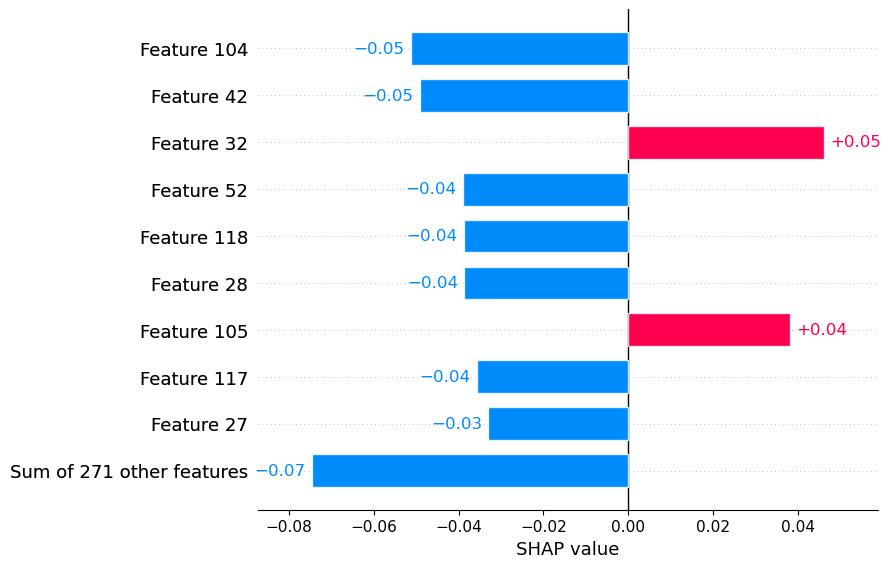

In [ ]:
shap.plots.bar(shap_values_model[0])

In [ ]:
print(y_wacsf_pred.flatten())
print(y_wacsf_true)

[1. 1. 1. 1. 1. 1. 0. 1. 1. 0. 1. 1. 1. 1. 1. 0. 1. 1. 0. 1. 1. 1. 1. 1.
 1. 0. 0. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 1. 1. 0. 0.
 0. 1. 1. 1. 0. 0. 0. 0. 0. 0. 0. 1. 1. 0. 1. 0. 1. 1. 1. 1. 0. 1. 1. 1.
 1. 0. 1. 0. 1. 1. 0. 0. 1. 0. 1. 0. 1. 0. 1. 1. 1. 0. 1. 0. 0. 0. 0. 1.
 1. 1. 1. 1. 1. 1. 0. 0. 0. 1. 1. 0. 0. 0. 0. 1. 1. 1. 1. 1. 0. 0. 0. 0.
 0. 1. 0. 1. 1. 1. 1. 1. 0. 0. 0. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 1.
 1. 1. 0. 0. 0. 0. 0. 1. 1. 1. 1. 1. 0. 1. 1. 0. 0. 0. 0. 0. 1. 0. 0. 0.
 0. 0. 1. 1. 1. 1. 1. 0. 1. 1. 1. 0. 1. 1. 1. 0. 1. 1. 1. 1. 1. 1. 0. 1.
 1. 1. 1. 1. 1. 1. 1. 0. 1. 0. 1. 1. 1. 0. 0. 1. 0. 0. 0. 1. 0. 1. 1. 1.
 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 1. 1. 0. 1. 0. 1. 0. 0. 0. 1. 1.
 0. 1. 1. 1. 1. 0. 0. 1. 0. 1. 0. 0. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 0. 1. 1. 0. 1. 1. 0. 1. 1. 1. 1. 0. 1.]
[0 1 0 0 1 1 1 0 0 0 0 0 0 1 1 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 1 0 0 1

## ENSEMBLE MODEL ##

In [ ]:
mean_f1 = (acc + acc2 + acc3 + acc4 + acc5 + acc6)/6
mean_f1

0.7311892393720315

In [ ]:
mean2_f1 = (acc + acc2 + acc3 + acc5 + acc6)/5
mean2_f1

0.7302698966109864

In [ ]:
mean3_f1 = (acc + acc2 + acc3 + acc6)/4
mean3_f1

0.7311707040970663

In [ ]:
import shap